In [ ]:
import pandas as pd

df = pd.read_csv('gym_members_exercise_tracking.csv')

df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def duration_of_sessions(df: pd.DataFrame) -> dict:
    correlation_calories_burned = df["Session_Duration (hours)"].corr(df["Calories_Burned"])
    correlation_water_intake = df["Session_Duration (hours)"].corr(df["Water_Intake (liters)"] )
    correlation_fat_percentage = df["Session_Duration (hours)"].corr( df["Fat_Percentage"])
    correlation_frequency = df["Session_Duration (hours)"].corr(df["Workout_Frequency (days/week)"])

    # Agrupar datos por duración de la sesión y calcular valores medios
    grouped_stats = (
        df.groupby("Session_Duration (hours)")
        .agg(
            {
                "Calories_Burned": ["mean"],
                "Water_Intake (liters)": ["mean"],
                "Workout_Frequency (days/week)": ["mean"],
                "Fat_Percentage": ["mean"],
            }
        )
        .reset_index()
    )

    # Aplanar columnas
    grouped_stats.columns = ["_".join(col).strip() for col in grouped_stats.columns.values]

    result = {
        "result_dataframe": grouped_stats.to_dict(orient="records"),
        "dataframe": [
            {
                "labels": ["Duración de la Sesión", "Calorías Quemadas"],
                "correlation": float(correlation_calories_burned * 100),
                "x": grouped_stats["Session_Duration (hours)_"].to_list(),
                "y": grouped_stats["Calories_Burned_mean"].to_list(),
            },
            {
                "labels": ["Duración de la Sesión", "Ingesta de Agua"],
                "correlation": float(correlation_water_intake * 100),
                "x": grouped_stats["Session_Duration (hours)_"].to_list(),
                "y": grouped_stats["Water_Intake (liters)_mean"].to_list(),
            },
            {
                "labels": ["Duración de la Sesión", "Porcentaje de Grasa"],
                "correlation": float(correlation_fat_percentage * 100),
                "x": grouped_stats["Session_Duration (hours)_"].to_list(),
                "y": grouped_stats["Fat_Percentage_mean"].to_list(),
            },
            {
                "labels": ["Duración de la Sesión", "Frecuencia de Entrenamiento"],
                "correlation": float(correlation_frequency * 100),
                "x": grouped_stats["Session_Duration (hours)_"].to_list(),
                "y": grouped_stats["Workout_Frequency (days/week)_mean"].to_list(),
            },
        ],
    }

    return result



df = duration_of_sessions(df)



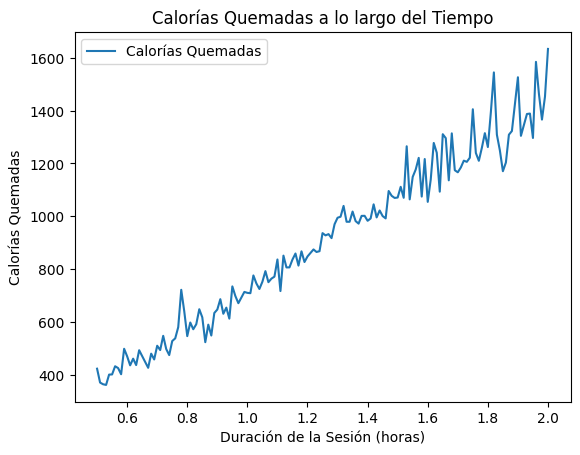

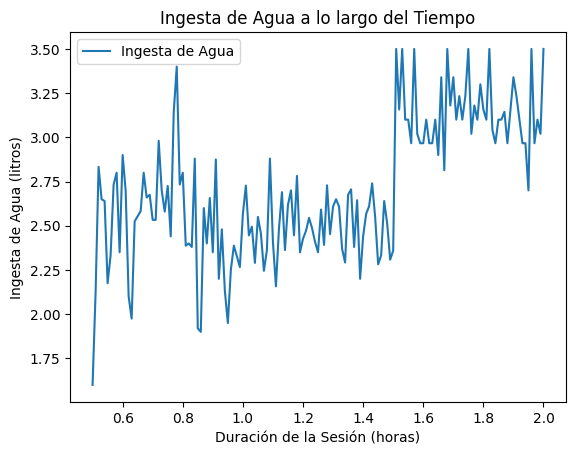

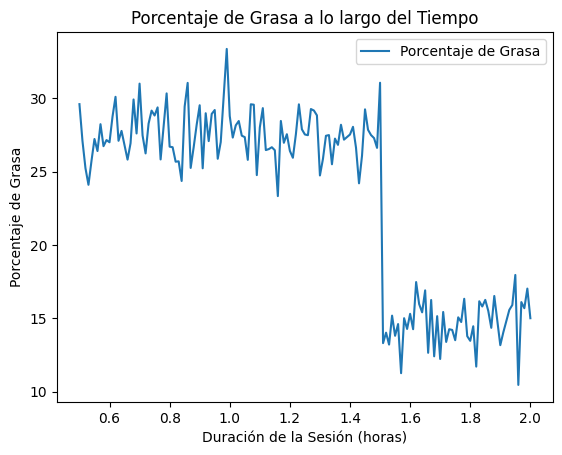

Text(0.5, 1.0, 'Frecuencia de Entrenamiento a lo largo del Tiempo')

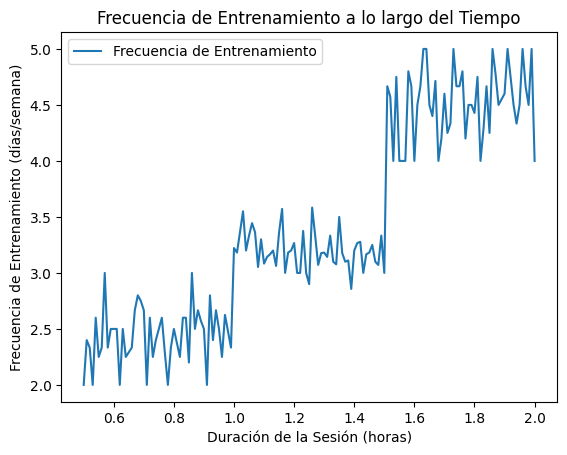

In [ ]:

grouped_data = pd.DataFrame(df['result_dataframe'])

# Extraer los datos necesarios
session_duration = grouped_data['Session_Duration (hours)_']
calorias_df = grouped_data['Calories_Burned_mean']
water_df = grouped_data['Water_Intake (liters)_mean']
frecuencia_df = grouped_data['Workout_Frequency (days/week)_mean']
fat_percentage_df = grouped_data['Fat_Percentage_mean']


# Gráfica de líneas de Calorías Quemadas a lo largo del Tiempo
plt.plot(session_duration, calorias_df, label='Calorías Quemadas')
plt.xlabel('Duración de la Sesión (horas)')
plt.ylabel('Calorías Quemadas')
plt.legend()
plt.title('Calorías Quemadas a lo largo del Tiempo')
plt.show()

# Gráfica de líneas de Ingesta de Agua a lo largo del Tiempo
plt.plot(session_duration, water_df, label='Ingesta de Agua')
plt.xlabel('Duración de la Sesión (horas)')
plt.ylabel('Ingesta de Agua (litros)')
plt.legend()
plt.title('Ingesta de Agua a lo largo del Tiempo')
plt.show()

# Gráfica de líneas de Porcentaje de Grasa a lo largo del Tiempo
plt.plot(session_duration, fat_percentage_df, label='Porcentaje de Grasa')
plt.xlabel('Duración de la Sesión (horas)')
plt.ylabel('Porcentaje de Grasa')
plt.legend()
plt.title('Porcentaje de Grasa a lo largo del Tiempo')
plt.show()

# Gráfica de líneas de Frecuencia de Entrenamiento a lo largo del Tiempo
plt.plot(session_duration, frecuencia_df, label='Frecuencia de Entrenamiento')
plt.xlabel('Duración de la Sesión (horas)')
plt.ylabel('Frecuencia de Entrenamiento (días/semana)')
plt.legend()
plt.title('Frecuencia de Entrenamiento a lo largo del Tiempo')
